In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
prsa_data = pd.read_csv("/content/PRSA_Data.csv")
prsa_data.head()

Unnamed: 0  No  SO2   NO2     CO         O3    PRES  RAIN   wd  WSPM  \
0           0   1  6.0  28.0  400.0  51.577659  1023.0   0.0  NNW   4.4   
1           1   2  6.0  28.0  400.0  50.403851  1023.2   0.0    N   4.7   
2           2   3 -1.0  19.0  400.0  54.923321  1023.5   0.0  NNW   5.6   
3           3   4  8.0  14.0   -1.0  -1.000000  1024.5   0.0   NW   3.1   
4           4   5  9.0  -1.0  300.0  54.296608  1025.2   0.0    N   2.0   

           AQI Label  
0  Severely Polluted  
1  Severely Polluted  
2  Severely Polluted  
3          Excellent  
4   Heavily Polluted

In [263]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [264]:
prsa_data.describe()

Unnamed: 0            No           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17531.500000  17532.500000     18.058734     63.236861   1251.121692   
std    10122.249256  10122.249256     22.558126     39.109232   1269.033556   
min        0.000000      1.000000     -1.000000     -1.000000     -1.000000   
25%     8765.750000   8766.750000      4.000000     34.000000    500.000000   
50%    17531.500000  17532.500000     10.000000     58.000000    900.000000   
75%    26297.250000  26298.250000     22.276800     87.000000   1500.000000   
max    35063.000000  35064.000000    282.000000    264.000000  10000.000000   

                 O3          PRES          RAIN          WSPM  
count  35064.000000  35064.000000  35064.000000  35064.000000  
mean      45.876835   1010.520250      0.067653      1.500217  
std       54.730861     26.289217      0.896833      1.105382  
min       -1.000000     -1.000000     -1.000000     -1.000000  
25%        2.397428   1002.500000      0.000000      0.800000  
50%       27.356346   1010.800000      0.000000      1.200000  
75%       69.548316   1019.400000      0.000000      2.000000  
max      363.769133   1040.300000     72.500000     11.200000

In [265]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

Unnamed: 0  No  SO2   NO2     CO         O3    PRES  RAIN   wd  WSPM  \
0           0   1  6.0  28.0  400.0  51.577659  1023.0   0.0  NNW   4.4   
1           1   2  6.0  28.0  400.0  50.403851  1023.2   0.0    N   4.7   
2           2   3  NaN  19.0  400.0  54.923321  1023.5   0.0  NNW   5.6   
3           3   4  8.0  14.0    NaN        NaN  1024.5   0.0   NW   3.1   
4           4   5  9.0   NaN  300.0  54.296608  1025.2   0.0    N   2.0   

           AQI Label  
0  Severely Polluted  
1  Severely Polluted  
2  Severely Polluted  
3          Excellent  
4   Heavily Polluted

# 3.Постройте визуализацию распределения каждого численного атрибута.


<Axes: xlabel='SO2', ylabel='Count'>

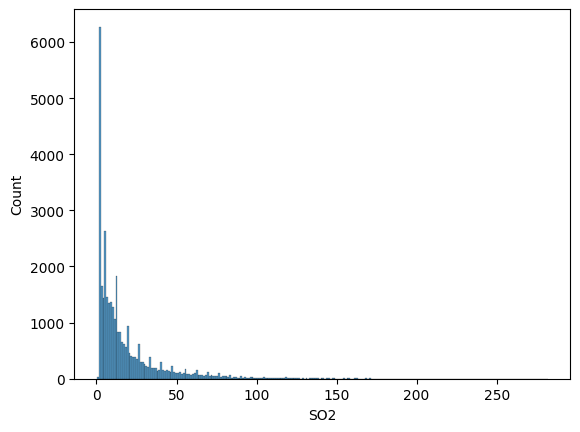

In [266]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Count'>

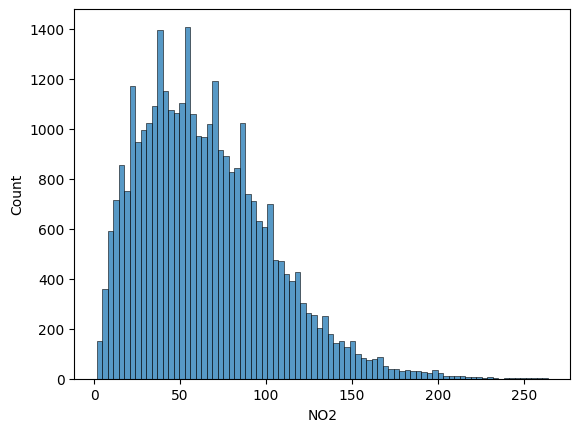

In [267]:
sns.histplot(prsa_data.NO2)

<Axes: xlabel='CO', ylabel='Density'>

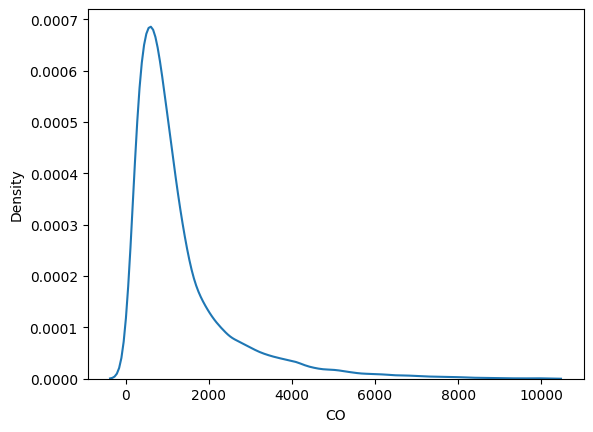

In [268]:
sns.kdeplot(prsa_data.CO)

<Axes: xlabel='CO', ylabel='Count'>

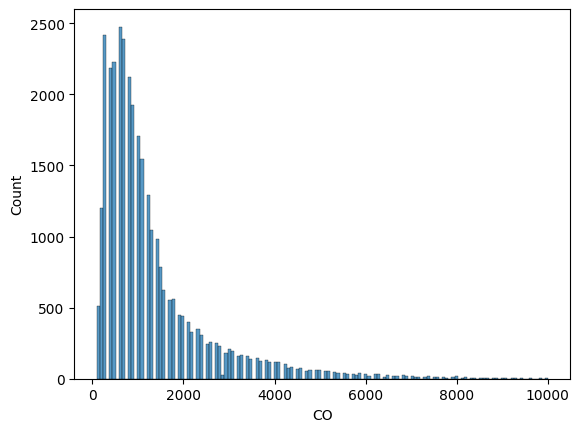

In [269]:
sns.histplot(prsa_data.CO)

<Axes: xlabel='O3', ylabel='Density'>

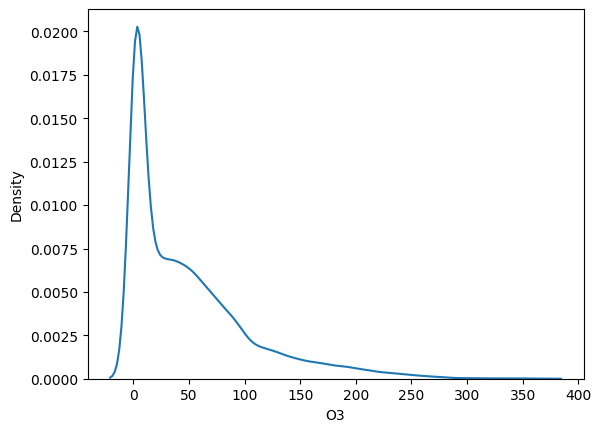

In [270]:
sns.kdeplot(prsa_data.O3)

<Axes: xlabel='O3', ylabel='Count'>

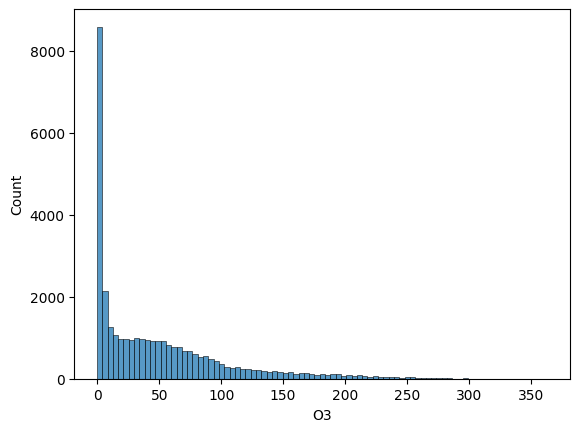

In [271]:
sns.histplot(prsa_data.O3)

<Axes: xlabel='NO2', ylabel='Density'>

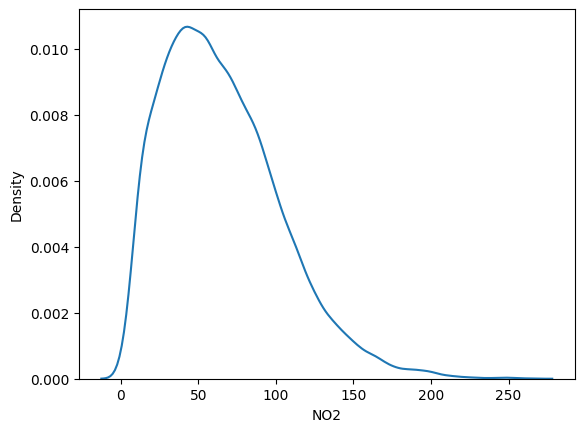

In [272]:
sns.kdeplot(prsa_data.NO2)

# 4.Исходя из распределения атрибутов по необходимости примените бинаризацию численных признаков.

In [273]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [274]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

Unnamed: 0            No           SO2           NO2            CO  \
count  35064.000000  35064.000000  34489.000000  33994.000000  33252.000000   
mean   17531.500000  17532.500000     18.376481     65.258789   1319.353513   
std    10122.249256  10122.249256     22.609648     37.996088   1268.114331   
min        0.000000      1.000000      0.285600      1.642400    100.000000   
25%     8765.750000   8766.750000      4.000000     36.000000    500.000000   
50%    17531.500000  17532.500000     10.000000     60.000000    900.000000   
75%    26297.250000  26298.250000     23.000000     88.000000   1600.000000   
max    35063.000000  35064.000000    282.000000    264.000000  10000.000000   

                 O3          PRES          WSPM       IS_RAIN  
count  32957.000000  35044.000000  35050.000000  35044.000000  
mean      48.873754   1011.097536      1.501215      0.040977  
std       55.113576     10.355247      1.104472      0.198240  
min       -0.275160    985.900000      0.000000      0.000000  
25%        3.579219   1002.500000      0.800000      0.000000  
50%       31.945652   1010.800000      1.200000      0.000000  
75%       72.876079   1019.400000      2.000000      0.000000  
max      363.769133   1040.300000     11.200000      1.000000

# 5. Постройте совместное распределение каждого признака вместе с целевой переменной. Сделайте вывод о необходимости проведения группировки данных.

<Axes: xlabel='SO2', ylabel='Density'>

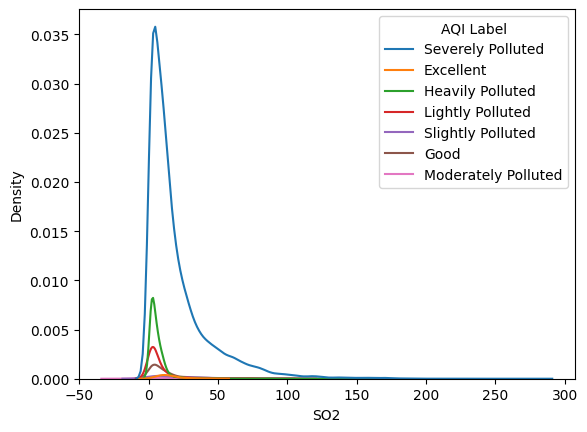

In [275]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='SO2', ylabel='Density'>

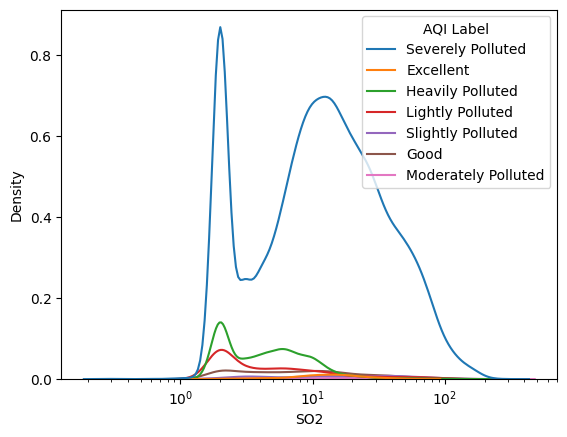

In [276]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label", log_scale=True)

<Axes: xlabel='NO2', ylabel='Density'>

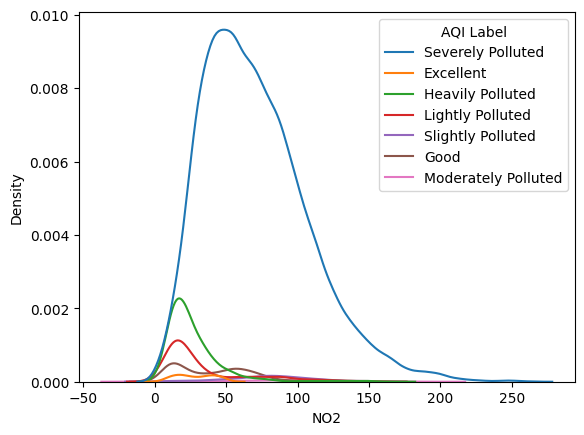

In [277]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

<Axes: xlabel='NO2', ylabel='Density'>

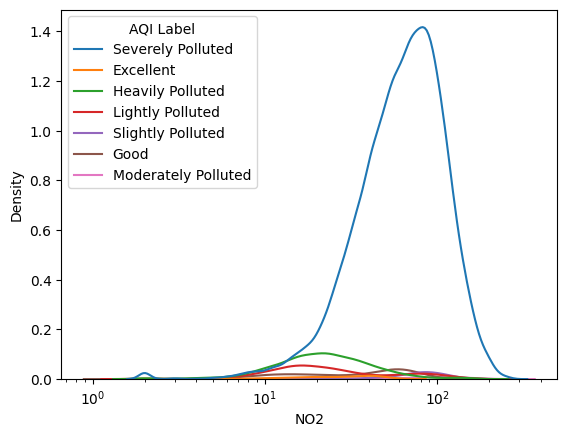

In [278]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label",log_scale=True)

<ipython-input-279-0dcfe490e9c4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

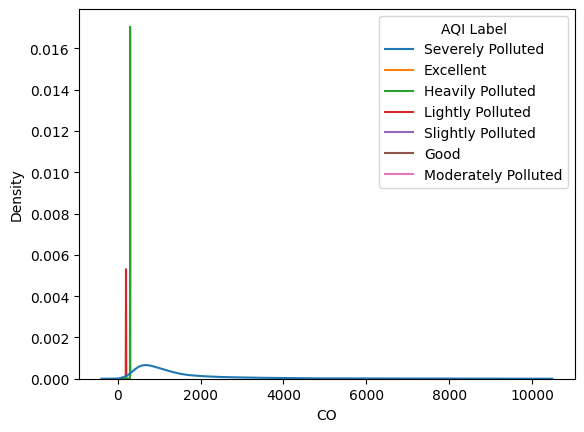

In [279]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

<ipython-input-280-a3fa3b806070>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=7)


<Axes: xlabel='CO', ylabel='Density'>

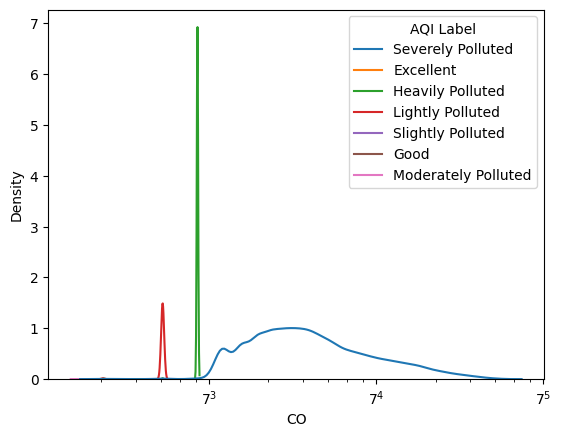

In [280]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=7)

In [281]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

Unnamed: 0  No  SO2   NO2     CO         O3    PRES   wd  WSPM  \
0           0   1  6.0  28.0  400.0  51.577659  1023.0  NNW   4.4   
1           1   2  6.0  28.0  400.0  50.403851  1023.2    N   4.7   
2           2   3  NaN  19.0  400.0  54.923321  1023.5  NNW   5.6   
3           3   4  8.0  14.0    NaN        NaN  1024.5   NW   3.1   
4           4   5  9.0   NaN  300.0  54.296608  1025.2    N   2.0   

           AQI Label  IS_RAIN CO_bin_custom_label  
0  Severely Polluted      0.0                   3  
1  Severely Polluted      0.0                   3  
2  Severely Polluted      0.0                   3  
3          Excellent      0.0                 NaN  
4   Heavily Polluted      0.0                   2

In [282]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

Unnamed: 0  No  SO2   NO2     CO         O3    PRES   wd  WSPM  \
0           0   1  6.0  28.0  400.0  51.577659  1023.0  NNW   4.4   
1           1   2  6.0  28.0  400.0  50.403851  1023.2    N   4.7   
2           2   3  NaN  19.0  400.0  54.923321  1023.5  NNW   5.6   
3           3   4  8.0  14.0    NaN        NaN  1024.5   NW   3.1   
4           4   5  9.0   NaN  300.0  54.296608  1025.2    N   2.0   

           AQI Label  IS_RAIN  CO_bin_custom_label  
0  Severely Polluted      0.0                    3  
1  Severely Polluted      0.0                    3  
2  Severely Polluted      0.0                    3  
3          Excellent      0.0                    0  
4   Heavily Polluted      0.0                    2

In [283]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<ipython-input-283-5a60bf876b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES <= 992] = 992
<ipython-input-283-5a60bf876b2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES >= 1034] = 1034


<Axes: >

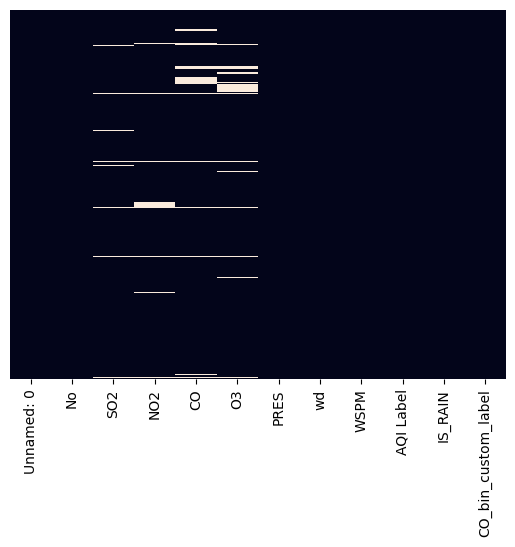

In [284]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [285]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [286]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

In [287]:
prsa_data.isnull().sum()

Unnamed: 0                0
No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [288]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [289]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [290]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [291]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

In [292]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

Unnamed: 0  No          SO2   NO2     CO  O3    PRES   wd  WSPM  \
0           0   1     6.000000  28.0  400.0  52  1023.0  NNW   4.4   
1           1   2     6.000000  28.0  400.0  50  1023.2    N   4.7   
2           2   3  1011.055986  19.0  400.0  55  1023.5  NNW   5.6   
4           4   5     9.000000   NaN  300.0  54  1025.2    N   2.0   
5           5   6     8.000000  17.0  300.0  54  1025.6    N   3.7   

           AQI Label  IS_RAIN  CO_bin_custom_label  
0  Severely Polluted      0.0                    3  
1  Severely Polluted      0.0                    3  
2  Severely Polluted      0.0                    3  
4   Heavily Polluted      0.0                    2  
5   Heavily Polluted      0.0                    2

In [293]:
prsa_data.SO2 = np.log(prsa_data.SO2)

# 1.При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

<ipython-input-294-84446ebd6abe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prsa_data.SO2)


<Axes: xlabel='SO2', ylabel='Density'>

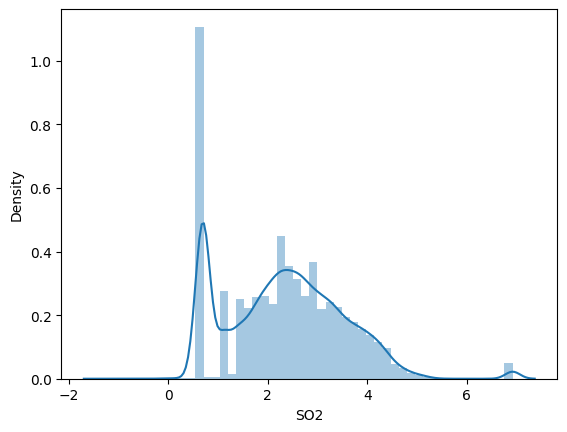

In [294]:
sns.distplot(prsa_data.SO2)

(array([5.000e+00, 2.900e+01, 7.791e+03, 5.607e+03, 8.993e+03, 6.974e+03,
        3.822e+03, 6.710e+02, 7.000e+00, 2.810e+02]),
 array([-1.25316305, -0.43597168,  0.38121968,  1.19841104,  2.01560241,
         2.83279377,  3.64998514,  4.4671765 ,  5.28436787,  6.10155923,
         6.91875059]),
 <BarContainer object of 10 artists>)

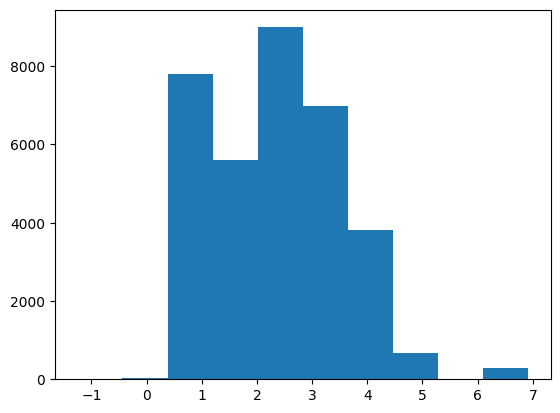

In [295]:
plt.hist(prsa_data.SO2)

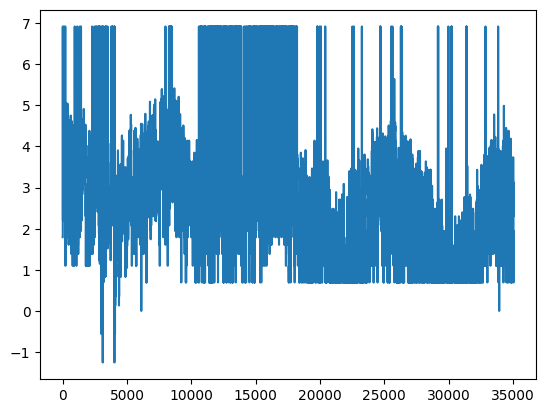

In [296]:
plt.plot(prsa_data.SO2)

можно заметить, что наиболее ярко распределение показывает самый первый график(distplot)

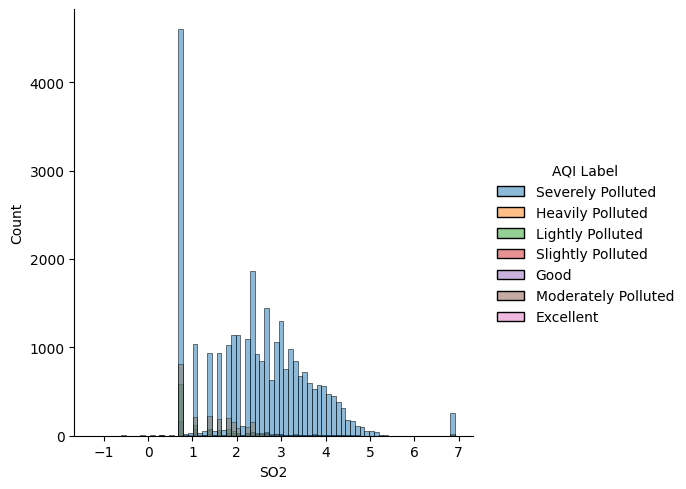

In [297]:
sns.displot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='SO2', ylabel='Proportion'>

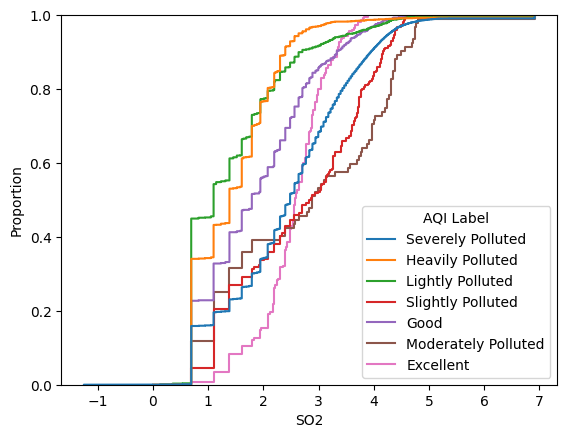

In [298]:
sns.ecdfplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='SO2'>

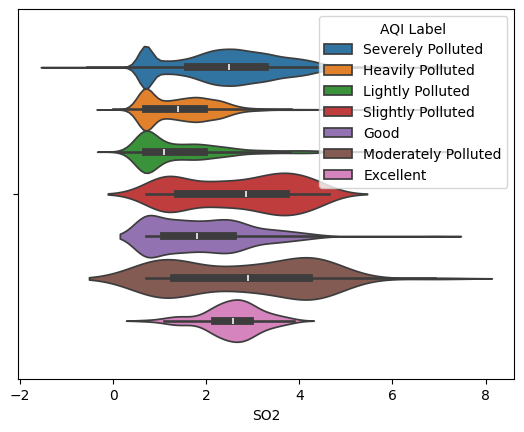

In [299]:
sns.violinplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='SO2', ylabel='Density'>

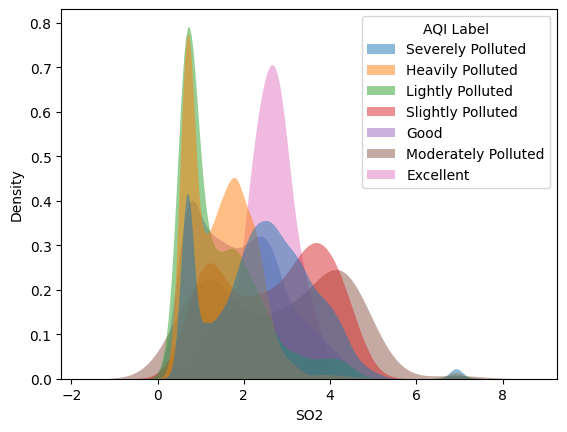

In [300]:
sns.kdeplot(
   data=prsa_data, x="SO2", hue="AQI Label",color='coolwarm',
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

мне кажется, что наиболее хорошо можно уыидеть распределение  на последнем графике

# 2.При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

<Axes: xlabel='PRES', ylabel='Count'>

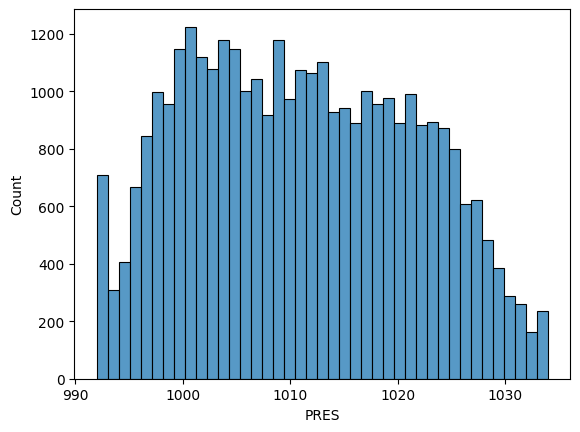

In [301]:
sns.histplot(prsa_data.PRES)

In [302]:
max = np.percentile(prsa_data.PRES, 99)
min = np.percentile(prsa_data.PRES, 1)
prsa_data.PRES[prsa_data.PRES <= min] = min
prsa_data.PRES[prsa_data.PRES >= max] = max

<ipython-input-302-b1a8ec48f79f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES <= min] = min
<ipython-input-302-b1a8ec48f79f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES >= max] = max


<Axes: xlabel='PRES', ylabel='Count'>

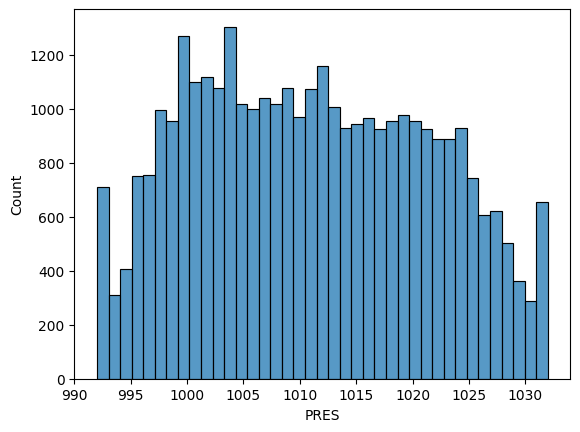

In [303]:
sns.histplot(prsa_data.PRES)

# 3.Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

<Axes: xlabel='CO', ylabel='Count'>

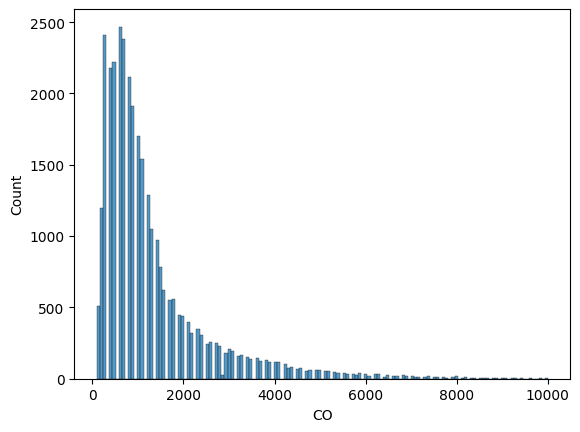

In [304]:
sns.histplot(prsa_data.CO)

при заполнении средним можно заметить весьма существенные изменения в графике, этот метод нам явно не подходит из-за неравномерности распределения данных

In [305]:
#prsa_data.CO = prsa_data.CO.fillna(prsa_data.PRES.median())

In [306]:
#sns.histplot(prsa_data.CO)

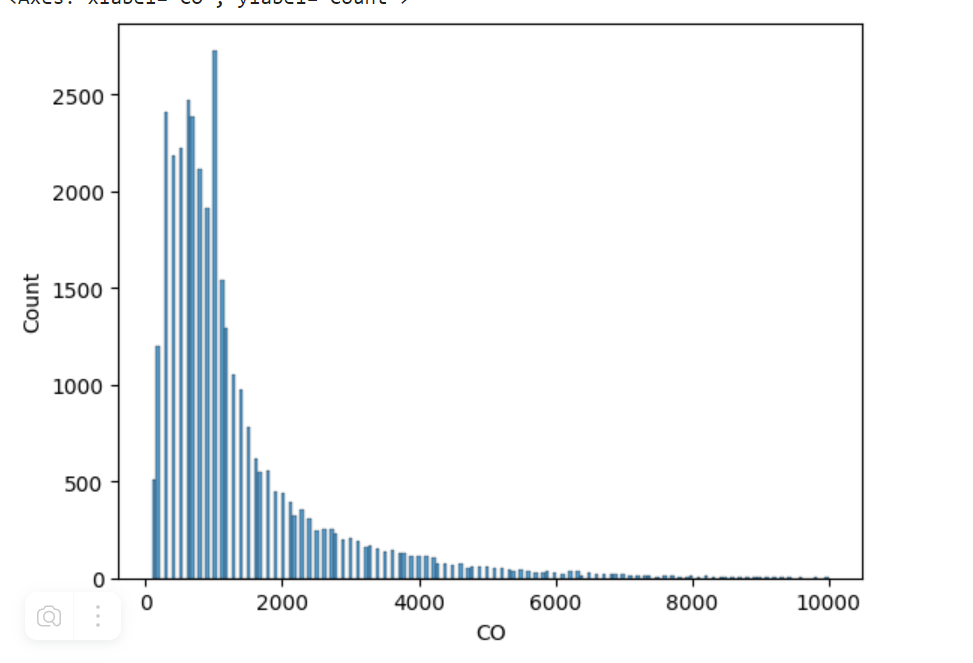

    



In [307]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
prsa_data.CO = imputer.fit_transform(prsa_data.CO.values.reshape(-1, 1))

<Axes: xlabel='CO', ylabel='Count'>

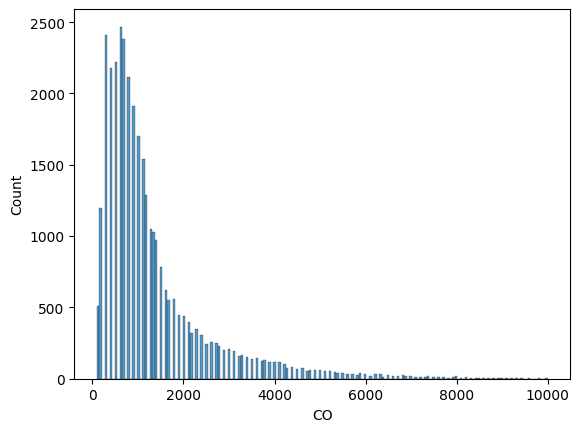

In [308]:
sns.histplot(prsa_data.CO)

 я сделала заполнение с помощью импутации по k ближайшим соседям, примечательно, что график распределения визуально почти не изменился
 повторим визуализацию пропусков, чтобы убедиться, что все значения заполнены и заполним оставшиеся пропуски тем же методом  

<Axes: >

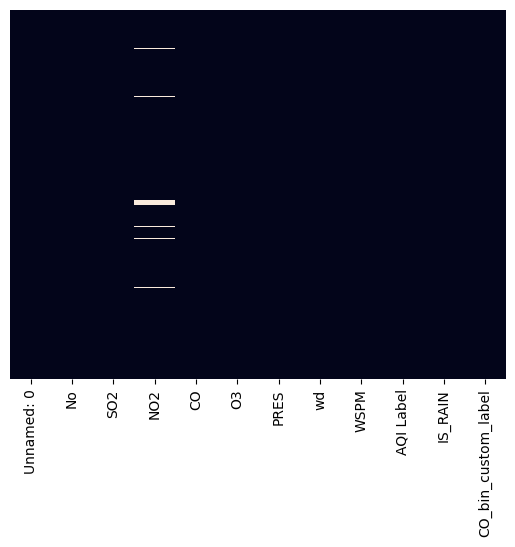

In [309]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

<Axes: xlabel='NO2', ylabel='Count'>

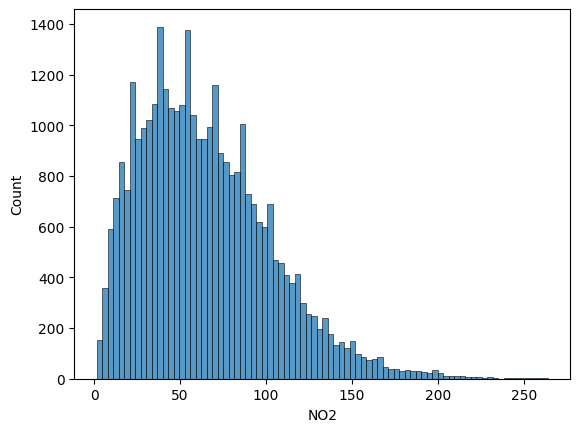

In [310]:
sns.histplot(prsa_data.NO2)

In [311]:
#imputer = KNNImputer(n_neighbors=5)
#prsa_data.NO2 = imputer.fit_transform(prsa_data.NO2.values.reshape(-1, 1))

In [312]:
#sns.histplot(prsa_data.NO2)

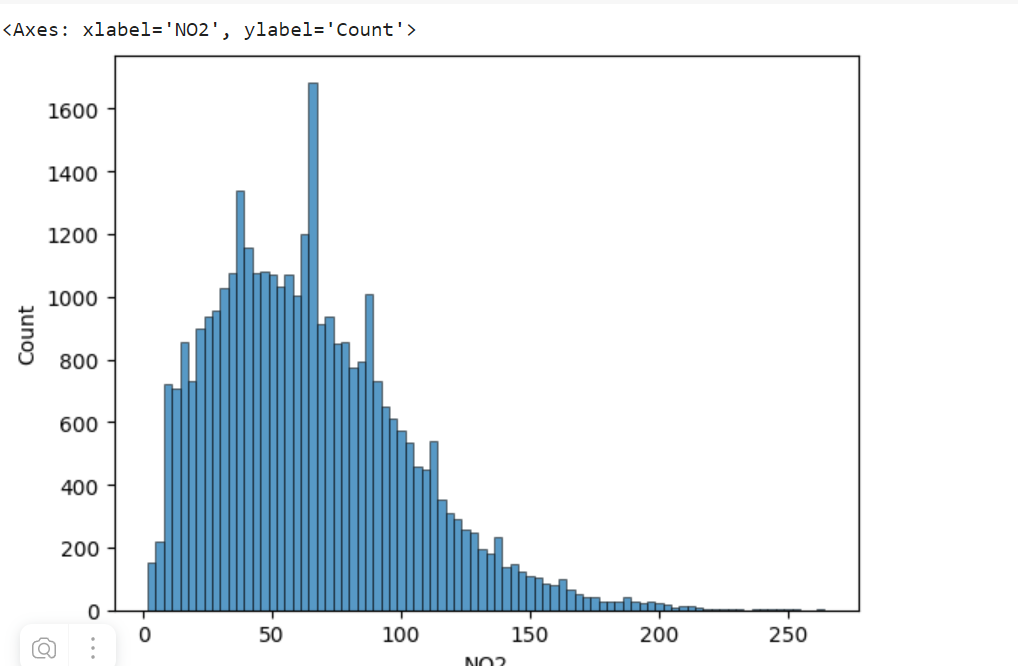


<Axes: xlabel='NO2', ylabel='Count'>

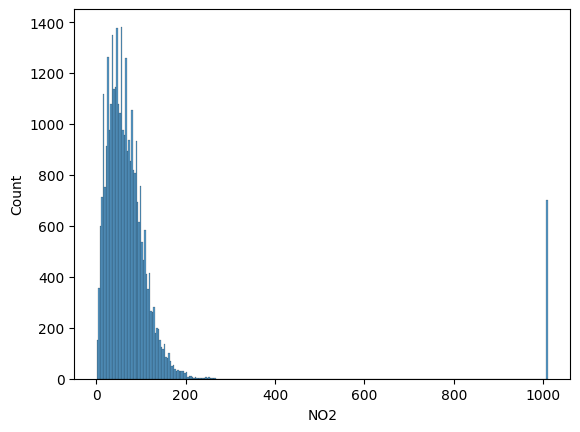

In [313]:
prsa_data.NO2 = prsa_data.NO2.fillna(prsa_data.PRES.median())
sns.histplot(prsa_data.NO2)

# 4.Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [317]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
prsa_data.CO = scaler.fit_transform(prsa_data.CO.values.reshape(-1, 1))
prsa_data.NO2 = scaler.fit_transform(prsa_data.NO2.values.reshape(-1, 1))
prsa_data.SO2 = scaler.fit_transform(prsa_data.SO2.values.reshape(-1, 1))
prsa_data.O3 = scaler.fit_transform(prsa_data.O3.values.reshape(-1, 1))

<Axes: xlabel='CO', ylabel='Count'>

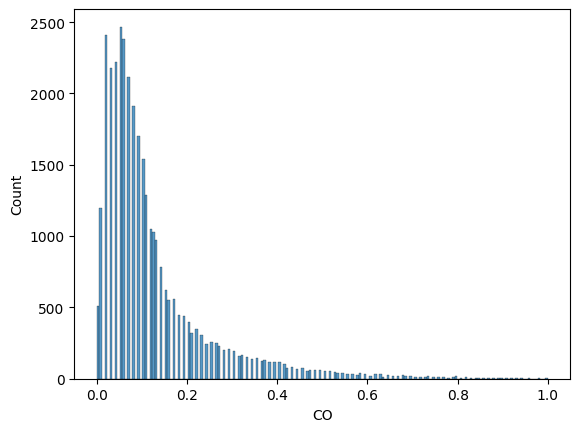

# 5. Постройте кореллограмму по всем численным столбцам датасета.

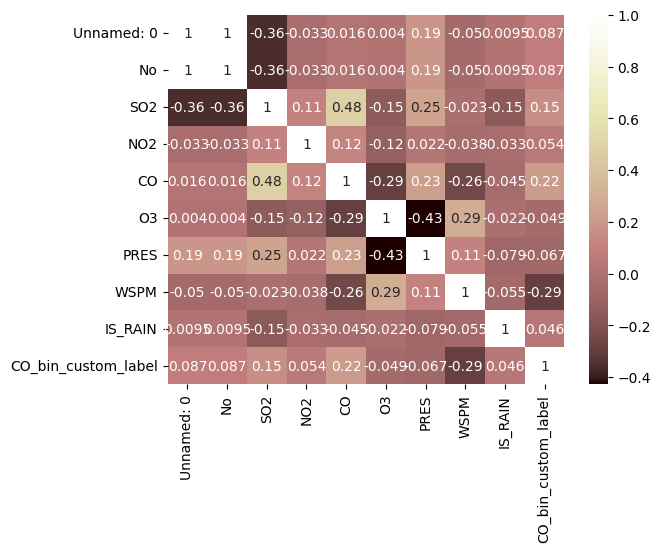

In [330]:
numeric_columns = prsa_data.select_dtypes(include=[np.number]).columns

corr = prsa_data[numeric_columns].corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="pink")
plt.show()

# 6.Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

Матрица рассеяния

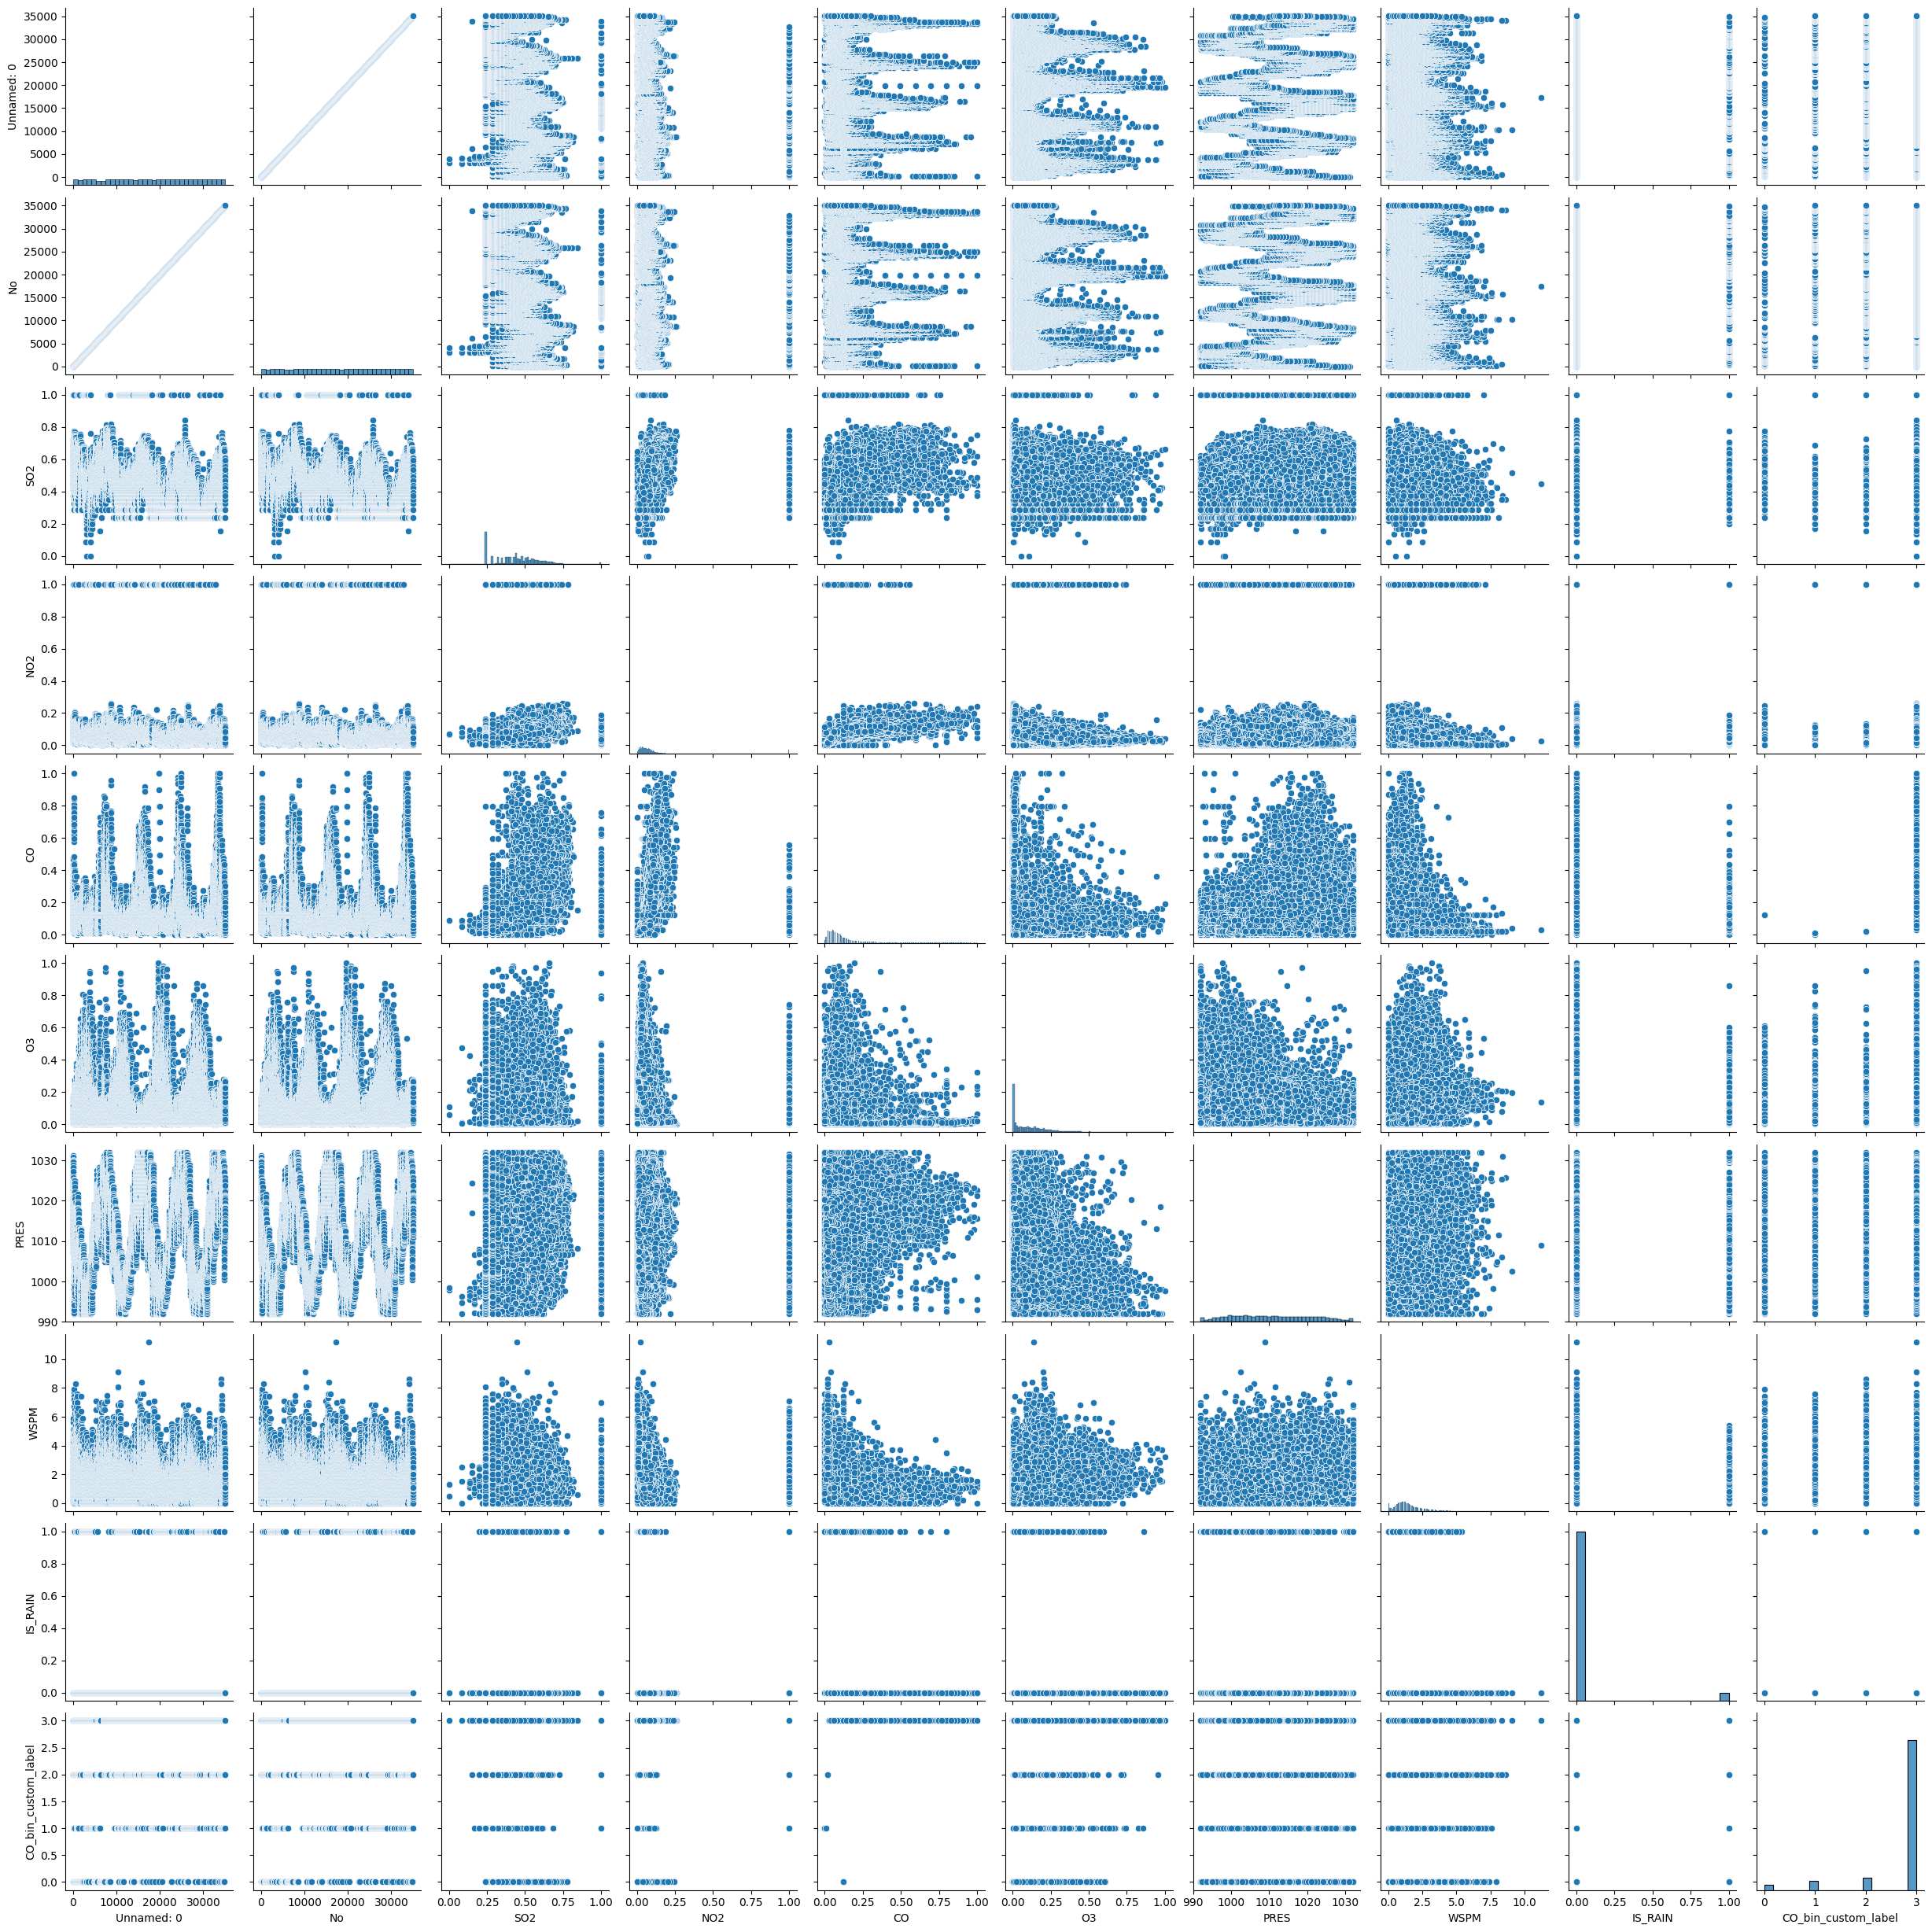

In [331]:
sns.pairplot(prsa_data[numeric_columns])
plt.show()

 дендограмма

<ipython-input-332-43a5f7e7299c>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = hierarchy.linkage(distance_matrix, method='ward')


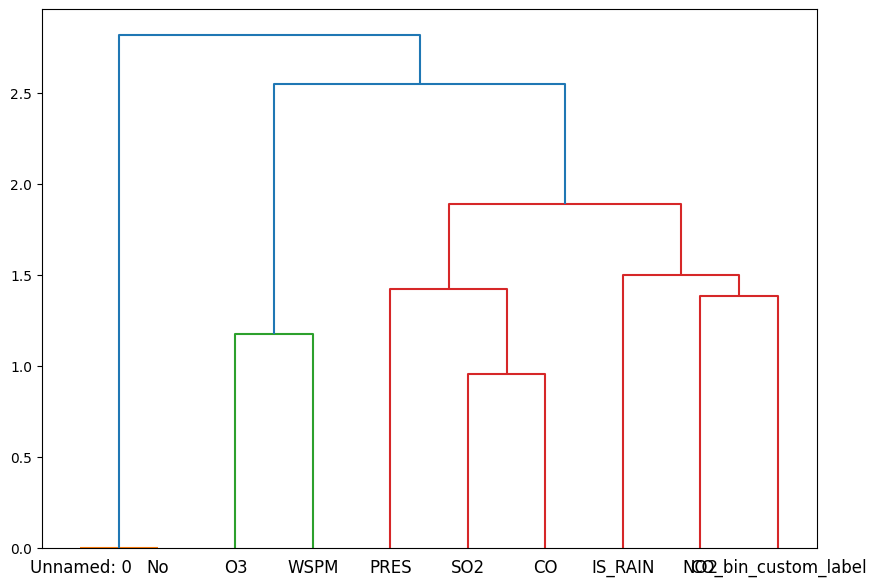

In [332]:
from scipy.cluster import hierarchy
distance_matrix = 1 - prsa_data[numeric_columns].corr()

dendrogram = hierarchy.linkage(distance_matrix, method='ward')

plt.figure(figsize=(10, 7))
hierarchy.dendrogram(dendrogram, labels=numeric_columns)
plt.show()